**ACCUMULATION OF ROUNDOFF ERROR**

Let's investigate how bad it can get...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import seed
from random import random

Create arrays of random numbers that will be added to 1, then subtracted from 1.  The **roundoff error** should then be the absolute value of the difference between 1 and the actual value.

In [2]:
nrands = 10
boost = 1.
seed(1)
summands = np.zeros(nrands)
for i in range(nrands):
    summands[i] = random()*boost

Note that the random() command gives a number between 0 and 1.  By "boosting" it to larger values, we can better reach the regime of <font color=red><b>catastrophic cancellation.</b></font>

Next, do the adding and subtracting.  To make sure we're treating the random numbers sufficiently randomly, let's switch up the order in which we're adding and subtracting them...

In [3]:
x = 1.
for i in range(nrands):
    x = x + summands[i]
for j in reversed(range(nrands)):
    x = x - summands[j]

In [4]:
x

1.0000000000000004

Try it again with different values of 'boost' and 'nrands'

Next, for a fixed value of 'boost,' let's build up an array of the errors to see how it varies as a function of 'nrands'

In [5]:
ntrial = 500
boost = 1.e7
fN = np.round(np.logspace(0.,5.,num=ntrial))
N = fN.astype(int)
error = np.zeros(ntrial)

for itrial in range(ntrial):
    Nnow = N[itrial]
    summand = np.zeros(Nnow)
    for i in range(Nnow):
        summand[i] = random()*boost
    x = 1.
    for i in range(Nnow):
        x = x + summand[i]
    for j in reversed(range(Nnow)):
        x = x - summand[j]
    error[itrial] = np.abs(x-1.)

In [6]:
xxx = np.log10(np.extract(error > 0,fN))
yyy = np.log10(np.extract(error > 0,error))
coef = np.polyfit(xxx,yyy,1)
error_fit = 10.**(np.polyval(coef,np.log10(fN)))
print()
print("error increases as:   N^",coef[0])


error increases as:   N^ 0.9885075585976549


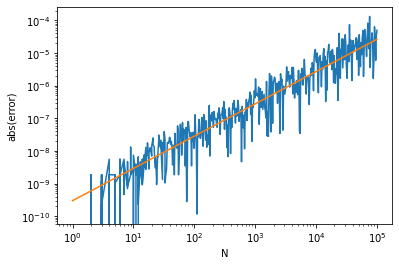

In [7]:
plt.xscale("log")
plt.yscale("log")
plt.xlabel("N")
plt.ylabel("abs(error)")
plt.plot(fN,error)
plt.plot(fN,error_fit);

<font color=red><b>Cautionary tale:</b></font>  When I first did this in IDL, there were some better features, and some worse ones.

**Better:**  For boost=1, x always stayed equal to 1 at machine precision.  In fact, even for boost=1e9, x only began to deviate from 1 for $N>9$.

**Worse:**  For boost=1e9 and larger values of $N$, the error increased as $N^{1.3}$.